In [57]:
# Run the script with
# `python run_experiment.py -t 1`
# This will run a simulation trial, with a total length of 1 seconds.
# Participant answere will be given every 0.001 to 0.002 seconds.
# The participant "ture" level of feedback is 2.

# The script will output:
# - A list of actions taken, in the format: 
# `elapsed_time > action_taken -> reward_received`
# - The Q-table at the end of the trial,
# with rows representing states and columns representing acions
# - The total count of given actions taken in a given state, 
# with rows representing states and columns representing acions
# - Total timesteps (actions) taken
# - Total reward obtained

# The agent is rewrded `-1` for guessing the wrong feedback level (not 2),
# and `0` for guessing correctly

import argparse
from ucbq_agent import UCBQAgent
from ucbq_environment import ModifiedRandomEnvironment
import time
import numpy as np

# parser = argparse.ArgumentParser()
# parser.add_argument("-t", "--TimeOut", help = "Stop script after n seconds")
# args = parser.parse_args()
timeOut = 60

num_states = 10
agent = UCBQAgent(num_states=num_states, num_actions=num_states)
state = 1
env = ModifiedRandomEnvironment(current_state = state, num_states=num_states)

start_time = time.time()
t = 0

episode_rewards = 0

q_values_for_chart = []

while True:
    elapsed_time = time.time() - start_time

    # Auto shut down scipt 
    if bool(timeOut) and (elapsed_time > float(timeOut)):
        break

    action = agent.choose_action(state) 
    # TODO: 
    # send_action_to_stream
    reward, next_state = env.step(action)

    # reward = pre_processor.process_reward(reward)
    # post_processor.collect(state, action, reward)
    # reward = post_processor.process_reward(reward)
    # reward = post_processor.smooth_reward(state, action, reward)
    
    # print(f"{round(elapsed_time, 2)} > {action} -> {reward}")
    
    agent.learn(state, action, reward, next_state)
    state = next_state

    episode_rewards += reward

    t += 1
    if t % 100 == 0:
        q_values_for_chart.append(np.around(np.sum(agent.Q, axis=0), decimals=4))

print(f'Q-table:')
print(f'{np.around(agent.Q, decimals=4)}')
print(f'Number of times action was taken:')
print(f'{agent.N}')
print(f'Total timesteps: {sum(sum(agent.N)) - 100}')
print(f'Episode rewards: {episode_rewards}')

Q-table:
[[-0.998  -0.998   0.     -0.9961 -0.998  -0.998  -0.998  -0.9961 -0.999
  -0.9961]
 [-0.9961 -0.999   0.     -0.999  -0.999  -0.998  -0.9995 -0.998  -0.9961
  -0.9998]
 [-1.     -1.      0.     -1.     -1.     -1.     -1.     -1.     -1.
  -1.    ]
 [-0.9995 -0.9961  0.     -0.9961 -0.9961 -0.999  -0.9961 -0.9961 -0.998
  -0.998 ]
 [-0.9961 -0.998   0.     -0.9961 -0.999  -0.999  -0.9961 -0.999  -0.9961
  -0.9961]
 [-0.998  -0.999   0.     -0.998  -0.998  -0.998  -0.998  -0.9961 -0.9961
  -0.999 ]
 [-0.999  -0.9995  0.     -0.9961 -0.9961 -0.998  -0.998  -0.9961 -0.9961
  -0.998 ]
 [-0.998  -0.9995  0.     -0.9961 -0.9961 -0.9961 -0.9961 -0.9961 -0.9961
  -0.9961]
 [-0.9995 -0.9961  0.     -0.999  -0.999  -0.9961 -0.998  -0.998  -0.9961
  -0.998 ]
 [-0.9961 -0.998   0.     -0.9961 -0.998  -0.998  -0.9961 -0.9961 -0.9961
  -0.9961]]
Number of times action was taken:
[[1.0000e+01 1.0000e+01 2.7100e+02 9.0000e+00 1.0000e+01 1.0000e+01
  1.0000e+01 9.0000e+00 1.1000e+01 9.0000e+0

In [56]:
import matplotlib.pyplot as plt

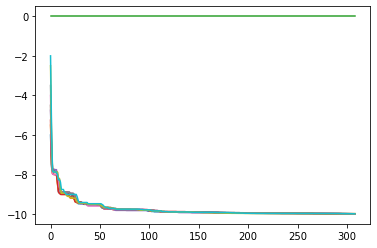

In [58]:
plt.plot(q_values_for_chart)